In [23]:
import numpy as np
import random

In [24]:
nchan = 30
Nst = 100

In [25]:
import os, sys
strunctfiledir='/Users/huifangwang/MULANa/humanCon/100-count-length-csv/'
dirs = os.listdir(strunctfiledir)
AllMat=[]

# This would print all the files and directories
for bfile in dirs:
    strunctfile=strunctfiledir+bfile+'/TVB/count.csv'
    try:
        csv = np.genfromtxt (strunctfile, delimiter="")
        chan_ch=random.sample(set(range(42)), nchan)
    except:
        continue
    sMat_raw=np.log(csv[chan_ch][:,chan_ch]/32+0.00001)
    
    sMat_norm=sMat_raw/sMat_raw.max()
    
    sMat_norm[sMat_norm < 0] = 0
     
    for inode in range(nchan):
        chan_ch=random.sample(set(range(nchan)),int(nchan/2))
        sMat_norm[chan_ch,inode]=sMat_norm[inode,chan_ch].T
        sMat_norm[inode,chan_ch]=0
    
    chan_ch=random.sample(set(range(42)), nchan)
    
    
    if np.shape(AllMat)[0]<1:
        AllMat = np.expand_dims(sMat_norm,axis=2)
    else:
        AllMat = np.concatenate([AllMat,np.expand_dims(sMat_norm,axis=2)],axis=2)
    #Mat_raw=csv[chan_ch][:,chan_ch]
    #Mat_norm=Mat_raw/Mat_raw.max()
    

In [29]:
AllMat.shape

(30, 30, 100)

In [26]:
import scipy.io
filename = strunctfiledir + 'stru100hConN30hh.mat' # also only for the half hemsphare
a={'sMat': AllMat}

scipy.io.savemat(filename,a)

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


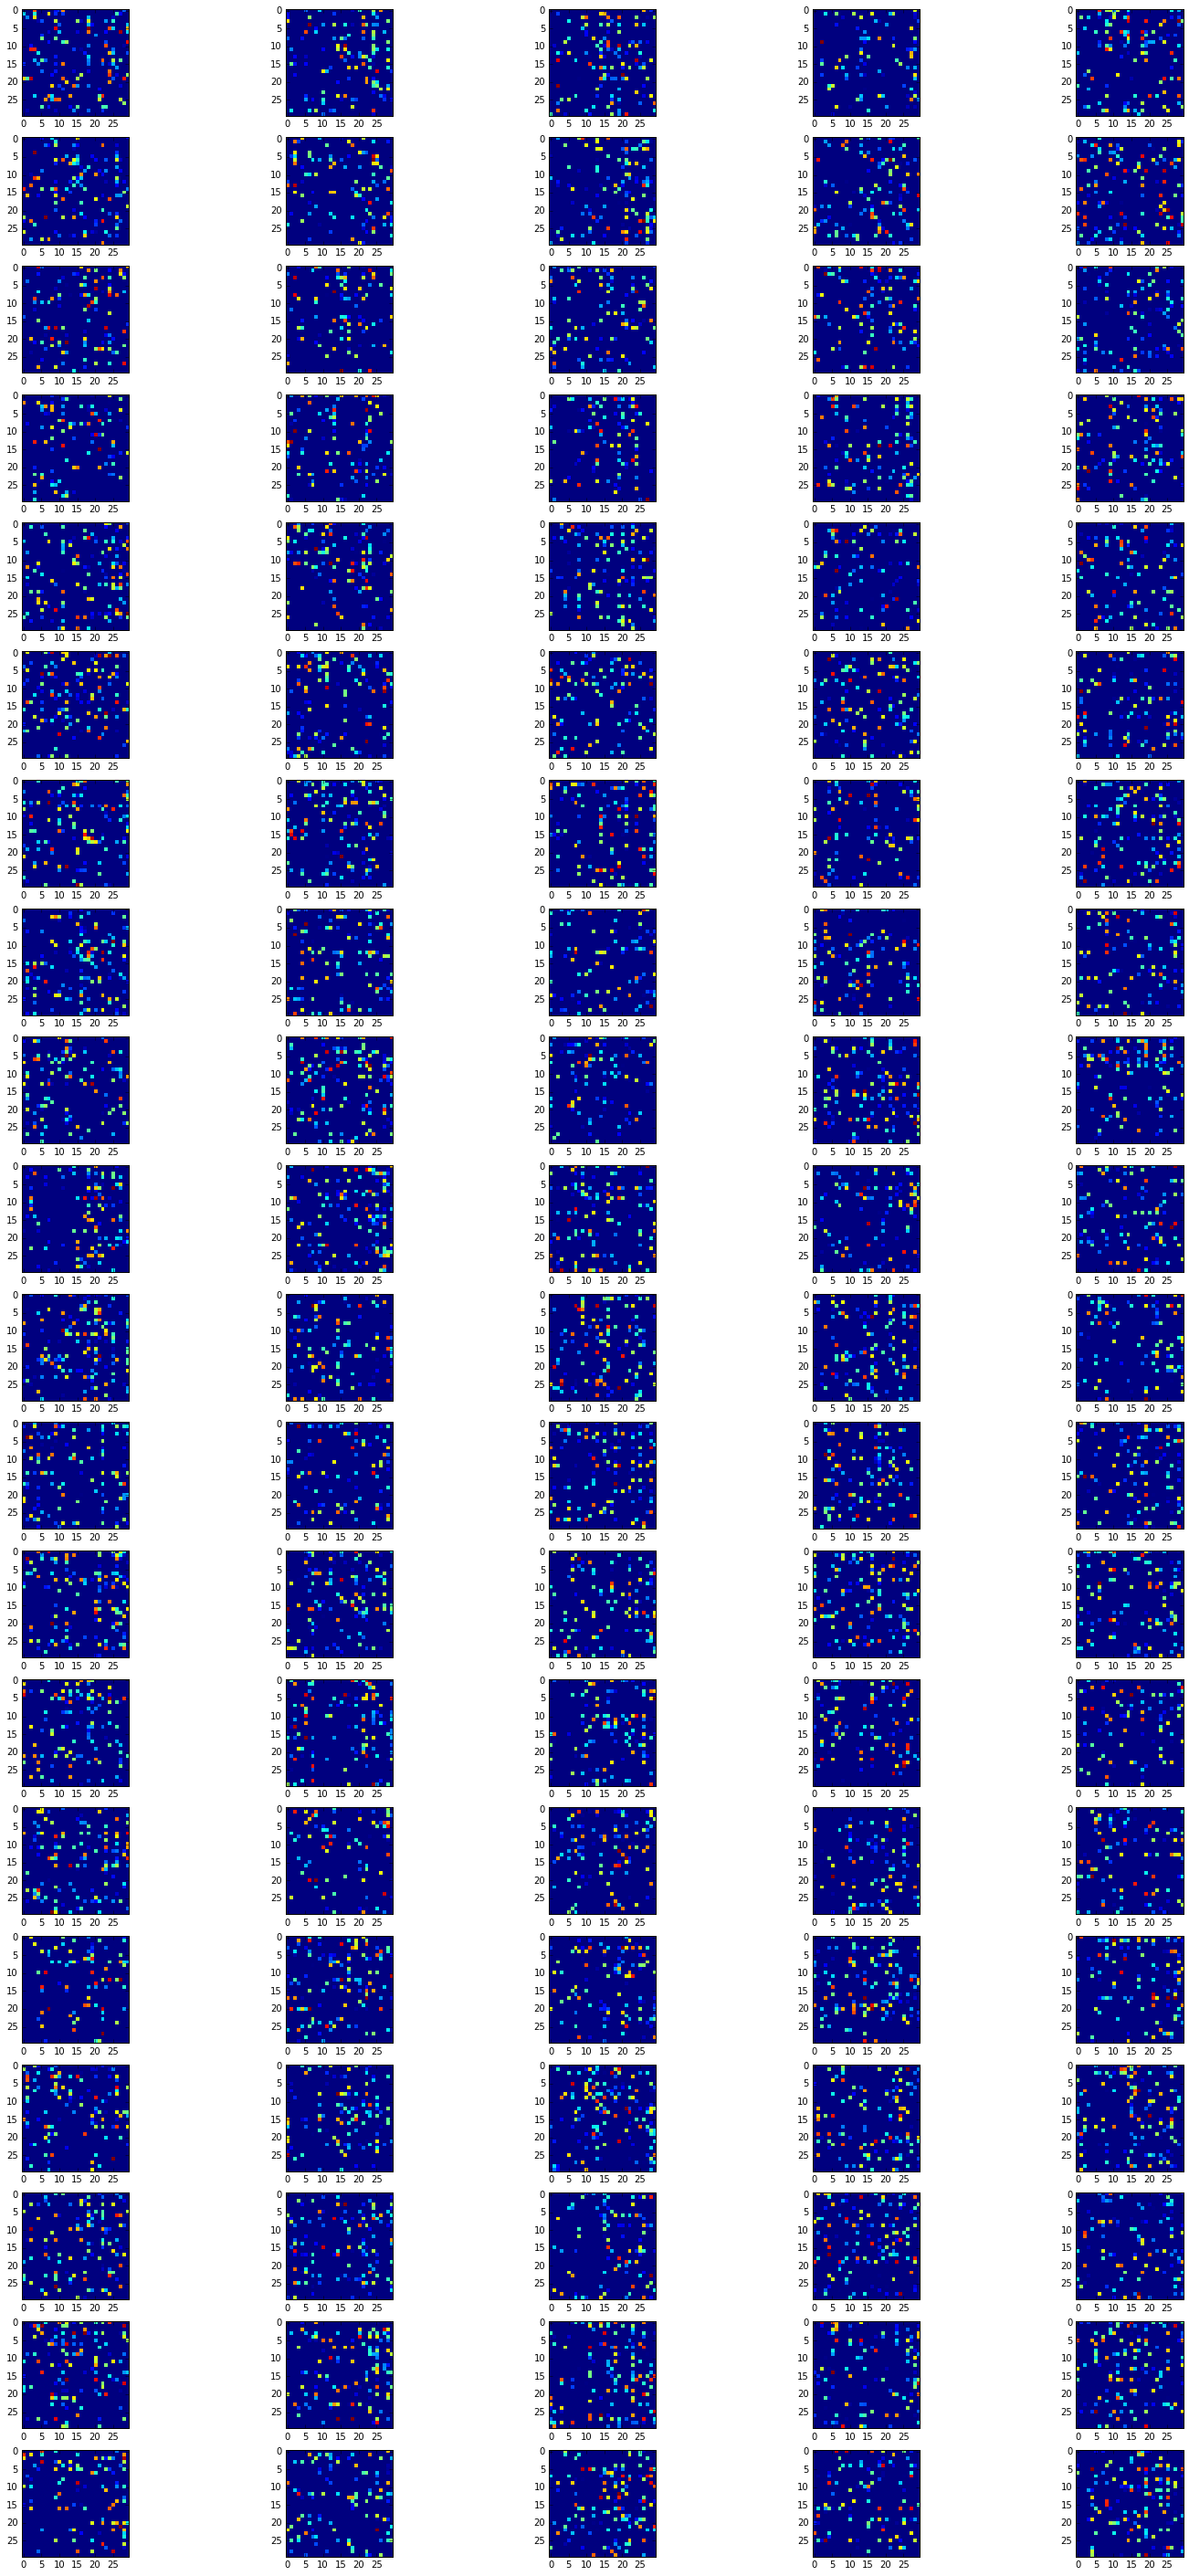

In [31]:
figure(figsize=[25,50])
for iMat in np.arange(100):
    subplot(20,5,iMat+1)
    sMat_i=AllMat[:,:,iMat]
    plt.imshow(sMat_i,interpolation='nearest')
    #plt.colorbar()
    #np.sum(sMat_i>0.9)    

In [16]:
sMat_i

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   6.37698854e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          8.22387019e-01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   3.97621022e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   4.07466859e-01,
       

In [9]:
sMat_i30=AllMat[:30,:30,5]
np.sum(sMat_i30>0.5) 

45

In [44]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


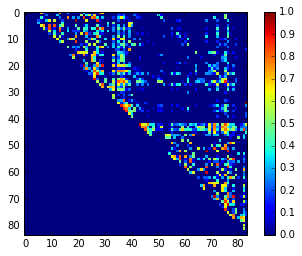

In [12]:

plt.imshow(AllMat[:,:,6],interpolation='nearest')
plt.colorbar()

In [13]:
sMat_raw=np.log10(csv+0.00001)

sMat_norm=sMat_raw/sMat_raw.max()

#plt.imshow(sMat_norm)

np.sum(sMat_norm>0.8)

90

In [33]:
strunctfiledir='/Users/huifangwang/MULANa/humanCon/100-count-length-csv/100408/TVB/count.csv'
length= np.genfromtxt (strunctfiledir, delimiter="")

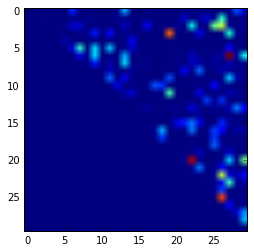

In [34]:
plt.imshow(length[:30,:30])